In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('C:\\Users\\yunting\\Documents\\credit_card\\train.csv')

In [2]:
train = pd.read_csv('C:\\Users\\yunting\\Documents\\credit_card\\train.csv')
test = pd.read_csv('C:\\Users\\yunting\\Documents\\credit_card\\test.csv')

In [3]:
print("train資料集維度：", train.shape)
print("test資料集維度：", test.shape)

train資料集維度： (1521787, 23)
test資料集維度： (421665, 22)


In [4]:
y = train['fraud_ind']
train = train.drop(['fraud_ind'],axis=1)

In [5]:
train_columnslist = train.columns.tolist()
train_no_na = train.dropna()
train_no_na_col=train.dropna(axis=1).columns.tolist()
na_set=set(train_columnslist)-set(train_no_na_col)
train_list_na = train[list(na_set)]
train_list_na.describe()

,flg_3dsmk,flbmk
count,1509206,1509206
unique,2,2
top,N,N
freq,1444867,1504133


In [6]:
train = train.drop(['flg_3dsmk', 'flbmk'], axis = 1)

In [7]:
train.dtypes

acqic      int64
bacno      int64
cano       int64
conam    float64
contp      int64
csmcu      int64
ecfg      object
etymd      int64
hcefg      int64
insfg     object
iterm      int64
locdt      int64
loctm    float64
mcc        int64
mchno      int64
ovrlt     object
scity      int64
stocn      int64
stscd      int64
txkey      int64
dtype: object

In [8]:
train['ecfg'].replace(['Y','N'],[1,0],inplace=True)
train['insfg'].replace(['Y','N'],[1,0],inplace=True)
train['ovrlt'].replace(['Y','N'],[1,0],inplace=True)


In [9]:
object_list = []
int_list = []
float_list = []
for col in train.columns.tolist() :
    if train[col].dtype == 'object' :
        object_list.append(col)
    if train[col].dtype == 'int64'  :
        int_list.append(col)
    if train[col].dtype == 'float64' :
        float_list.append(col)

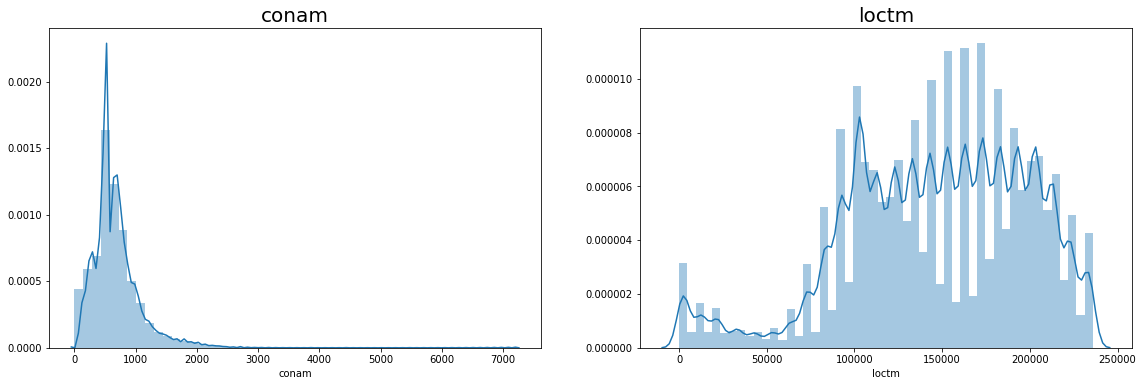

In [10]:
import seaborn as sns
count = 1
plt.figure(figsize=(30,20))

for col in float_list :
    plt.subplot(3,3,count) 
    sns.distplot(train[col].dropna())
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

In [11]:
train['log_conam'] = np.log(train['conam'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


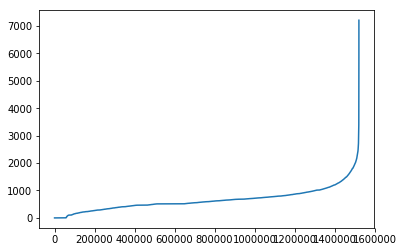

In [12]:
plt.plot(np.sort(train['conam']))

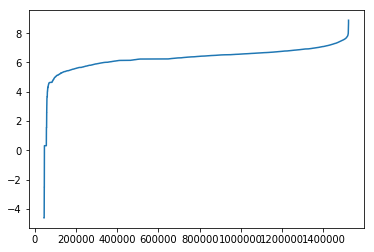

In [13]:
plt.plot(np.sort(train['log_conam']))

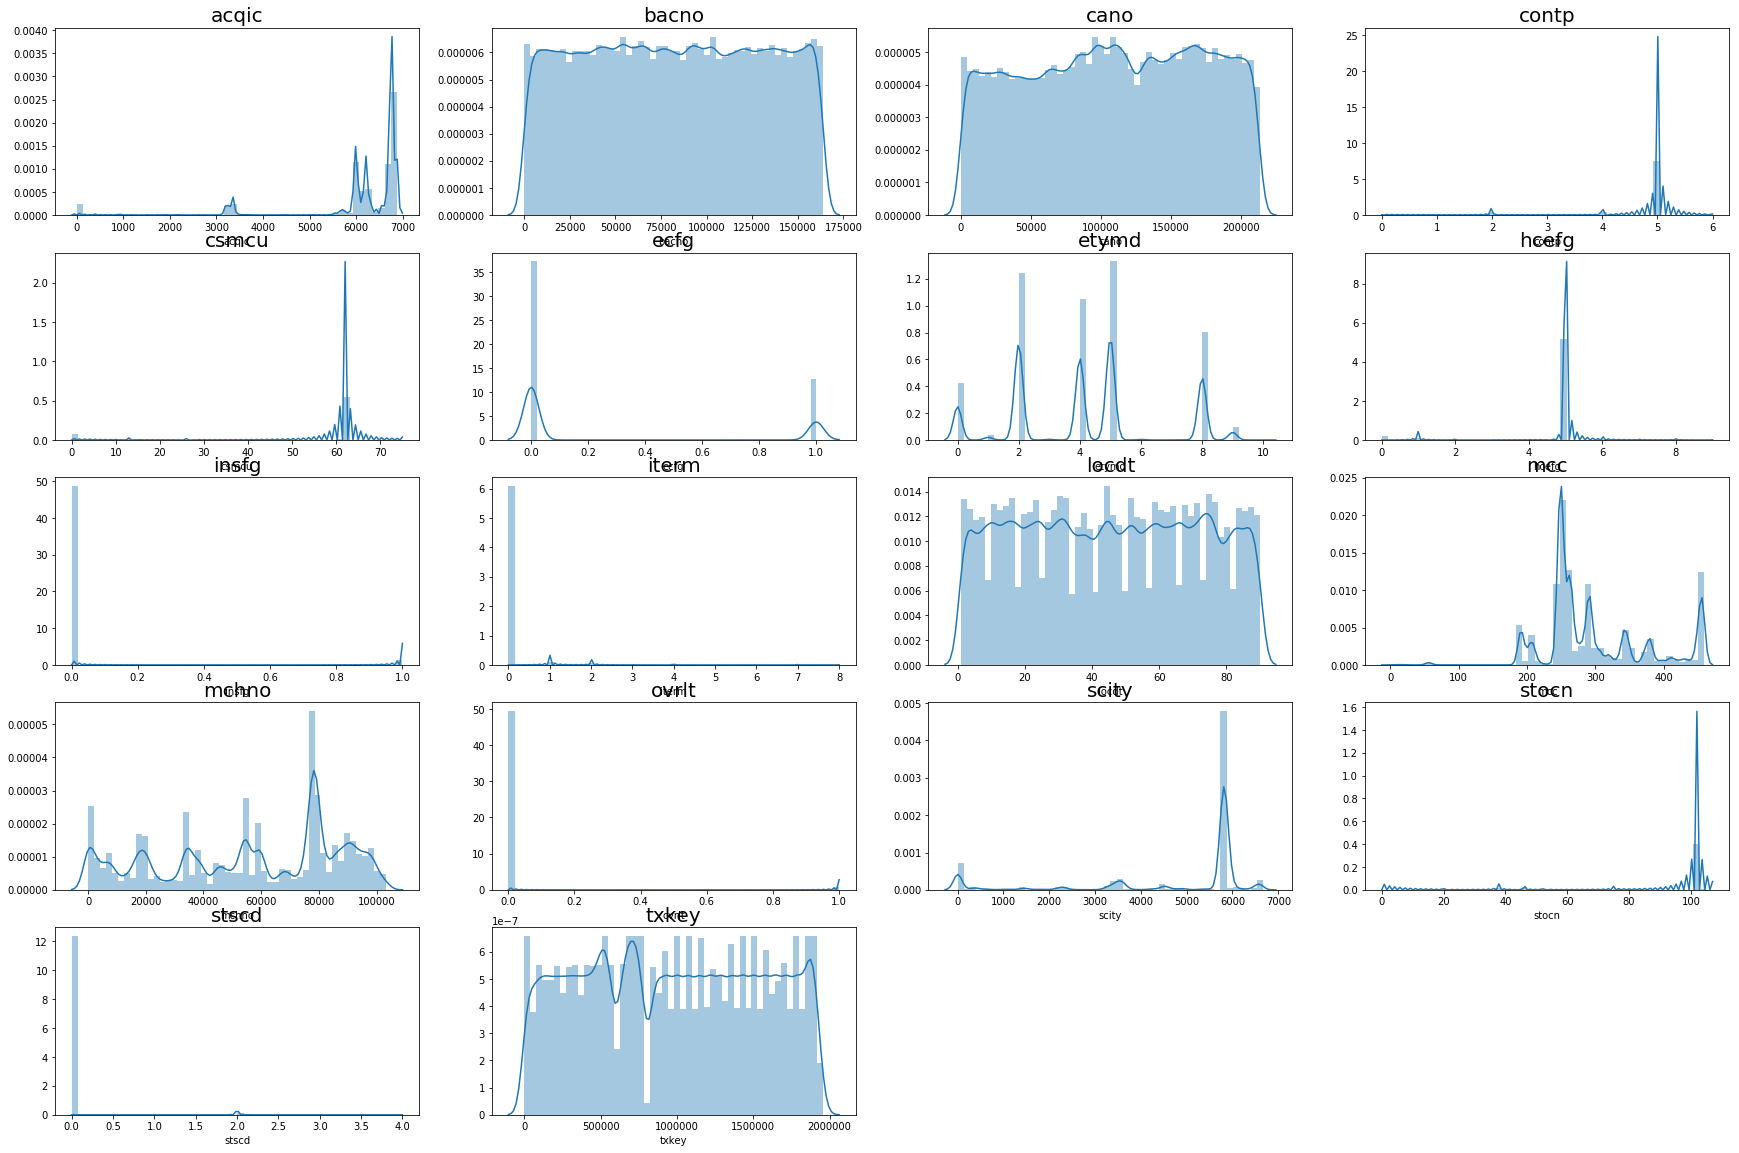

In [15]:
count = 1
plt.figure(figsize=(30,20))

for col in int_list :
    plt.subplot(5,4,count) 
    sns.distplot(train[col].dropna())
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

In [17]:
train.shape

(1521787, 21)

In [19]:
train.isna().sum()

acqic        0
bacno        0
cano         0
conam        0
contp        0
csmcu        0
ecfg         0
etymd        0
hcefg        0
insfg        0
iterm        0
locdt        0
loctm        0
mcc          0
mchno        0
ovrlt        0
scity        0
stocn        0
stscd        0
txkey        0
log_conam    0
dtype: int64

查看欺詐比

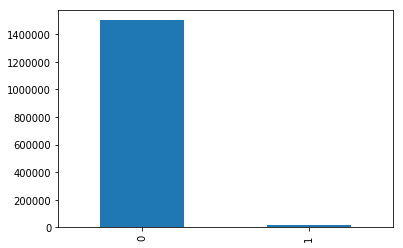

In [20]:
count_classes =pd.value_counts(y)
count_classes
count_classes.plot(kind='bar')
plt.show()

查看詐欺金額是否規律

In [34]:
data['log_conam'] = np.log(data['conam'])
print('Fraud')
print(data.log_conam[data.fraud_ind ==1].describe())
print('Normal')
print(data.log_conam[data.fraud_ind ==0].describe())

Fraud
count    2.035500e+04
mean             -inf
std               NaN
min              -inf
25%      5.375834e+00
50%      6.545852e+00
75%      6.923963e+00
max      8.117685e+00
Name: log_conam, dtype: float64
Normal
count    1.501432e+06
mean             -inf
std               NaN
min              -inf
25%      6.082698e+00
50%      6.382746e+00
75%      6.689226e+00
max      8.883054e+00
Name: log_conam, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [35]:
data['log_conam'] = np.log(data['conam'])
print('Fraud')
print(data.conam[data.fraud_ind ==1].describe())
print('Normal')
print(data.conam[data.fraud_ind ==0].describe())

Fraud
count    20355.000000
mean       712.266507
std        565.645161
min          0.000000
25%        216.120000
50%        696.350000
75%       1016.340000
max       3353.250000
Name: conam, dtype: float64
Normal
count    1.501432e+06
mean     6.539417e+02
std      4.000886e+02
min      0.000000e+00
25%      4.382100e+02
50%      5.915500e+02
75%      8.037000e+02
max      7.208770e+03
Name: conam, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


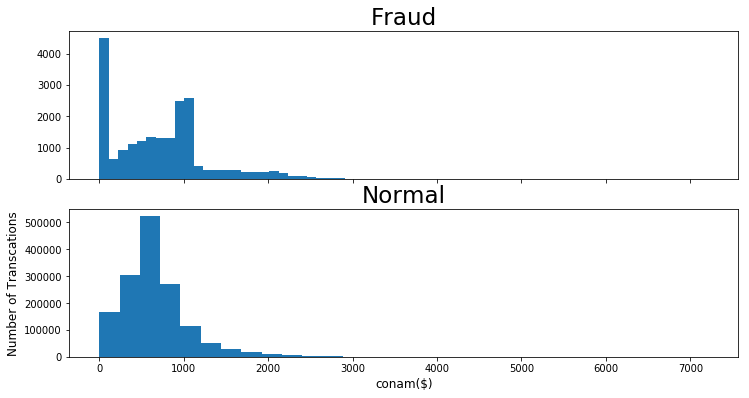

In [36]:
#查看信用卡交易金额的分布情况
f,(ax3,ax4) = plt.subplots(2,1,sharex=True,figsize=(12,6))
bins = 30

ax3.hist(data.conam[data.fraud_ind==1], bins=bins)
ax3.set_title("Fraud",fontsize = 23)

ax4.hist(data.conam[data.fraud_ind==0], bins=bins)
ax4.set_title("Normal",fontsize = 23)

plt.xlabel("conam($)",fontsize = 12)
plt.ylabel("Number of Transcations",fontsize = 12)

plt.show()

詐欺交易金額不大，且整體集中在小額交易

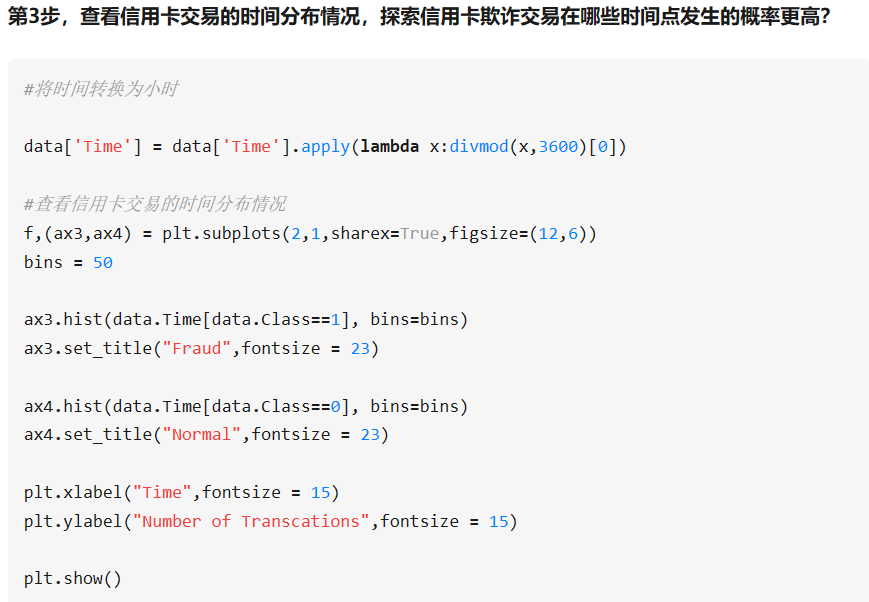

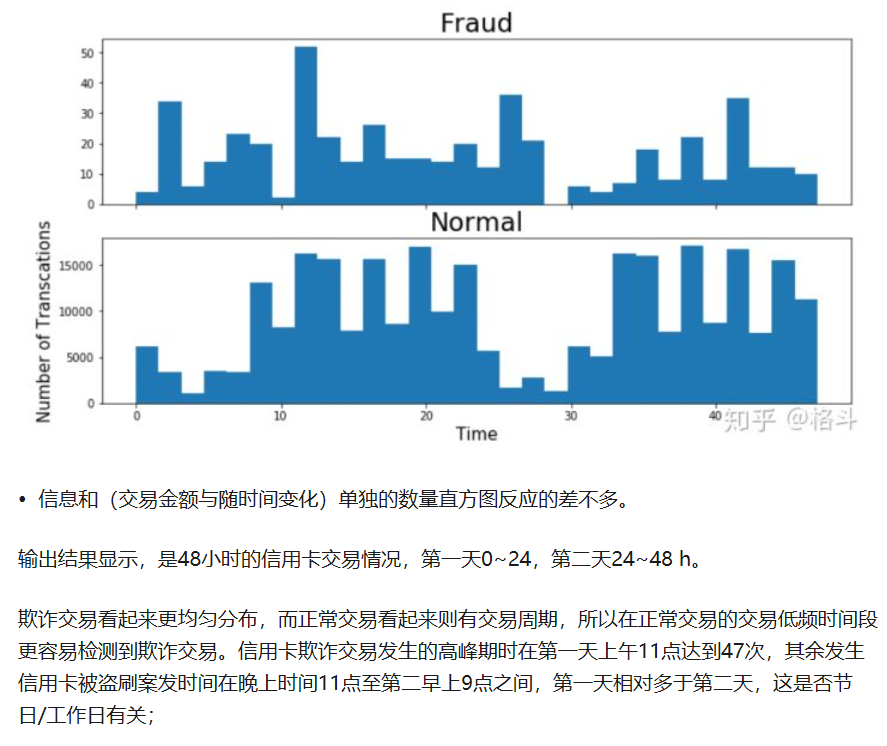

相關分析

In [39]:
corr = data.corr()
corr['fraud_ind']

acqic       -0.083684
bacno        0.000285
cano         0.004608
conam        0.016634
contp        0.023248
csmcu        0.013472
etymd        0.067743
fraud_ind    1.000000
hcefg        0.026210
iterm       -0.014662
locdt       -0.011773
loctm       -0.042688
mcc         -0.002827
mchno       -0.012187
scity       -0.028715
stocn       -0.161405
stscd        0.279225
txkey        0.034034
log_conam    0.003582
Name: fraud_ind, dtype: float64

stocn 消費地國別 stscd 狀態碼 對詐欺交易影響較大

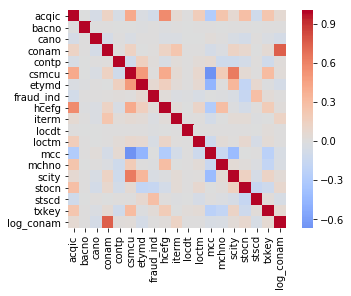

In [41]:
data_V = data
Correlation = data_V.corr()
sns.heatmap(Correlation,cmap='coolwarm',square=True,center=0)